### 📦 1. Import Libraries and Load Dataset

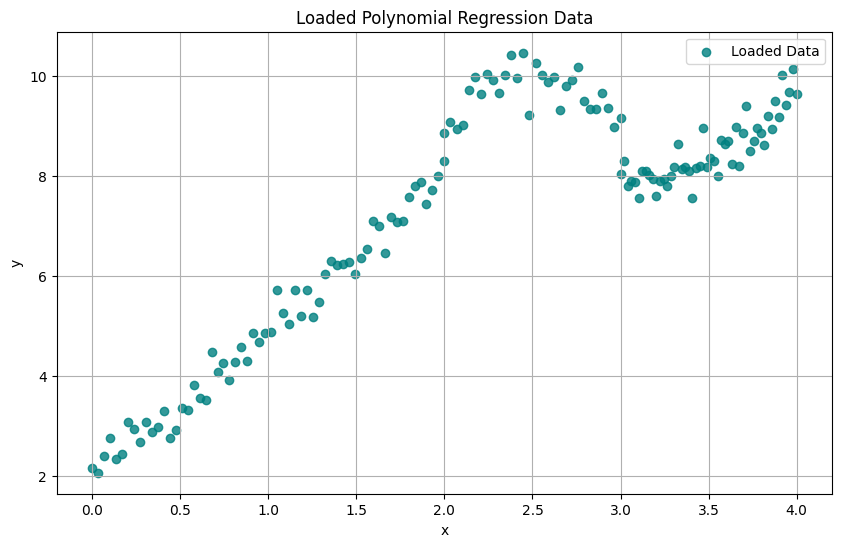

Loaded data shape: (140, 2)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file containing polynomial training data
df = pd.read_csv("polynomial_data.csv")

# Extract features and target
x = df["x_train"]
y = df["y_train"]

# Plot the raw data
plt.figure(figsize=(10, 6))
plt.scatter(df["x_train"], df["y_train"], color="teal", label="Loaded Data", alpha=0.8)
plt.title("Loaded Polynomial Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Print the shape of the loaded data
print("Loaded data shape:", df.shape)

### 🔄 2. Normalize Input Data

In [3]:
# Convert Series to numpy arrays and reshape for model input
x1 = x.to_numpy().reshape(x.shape[0], 1)
y1 = y.to_numpy().reshape(y.shape[0], 1)

# Normalize the input data (zero mean and unit variance)
M = np.mean(x1)
S = np.std(x1)
x1 = (x1 - M) / S

### 🧮 3. Generate Polynomial Features

In [4]:
# Generate polynomial features up to degree 5
x2 = x1 ** 2
x3 = x1 ** 3
x4 = x1 ** 4
x5 = x1 ** 5

# Concatenate features to create the design matrix
X = np.concatenate([x1, x2, x3, x4, x5], axis=1)

# Check the shape of the feature matrix
X.shape

(140, 5)

### ⚙️ 4. Initialize Model Parameters

In [15]:
# Initialize weights for each polynomial term
w = np.array([[2], [5], [6], [6], [5]])

# Initialize bias term
b = 0

# Get number of training examples
m = X.shape[0]

# Set learning rate
alpha = 0.01

# List to store cost at each iteration
all_cost = []

# Check shape of weights
w.shape

(5, 1)

### 🔁 5. Train the Polynomial Regression Model

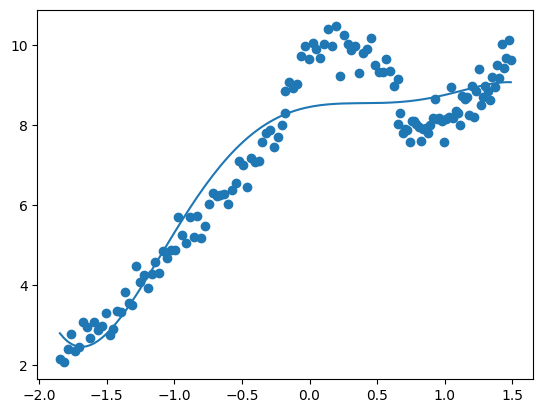

0.28817285550424887


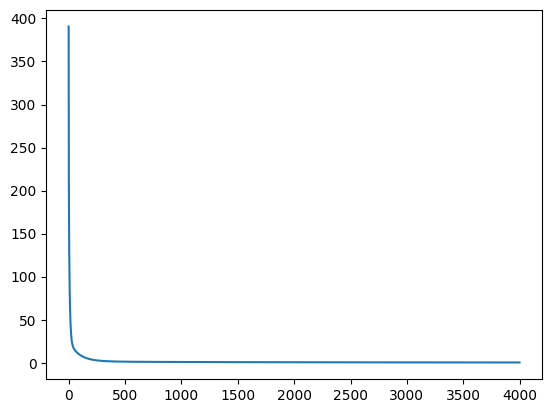

In [17]:
# Gradient descent for 1000 iterations
for _ in range(3000):
    y_ = X @ w + b                     # Compute predictions
    cost = (1 / (2 * m)) * np.sum((y_ - y1) ** 2)  # Compute cost (MSE)
    all_cost.append(cost)             # Store cost

    # Update weights and bias
    w = w - (alpha / m) * (X.T @ (y_ - y1))
    b = b - (alpha / m) * np.sum(y_ - y1)

# Plot predicted values against inputs
plt.scatter(x1, y1)
plt.plot(x1, y_)
plt.show()

# Plot cost over iterations
plt.plot(all_cost)
print(cost)